In [2]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset from the csv file using pandas. and then print first few columns using .head()
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Print the shape and description**

In [5]:

print(data.shape)

print(data.describe)

(284807, 31)
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462

In [6]:
data.isna().sum()  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

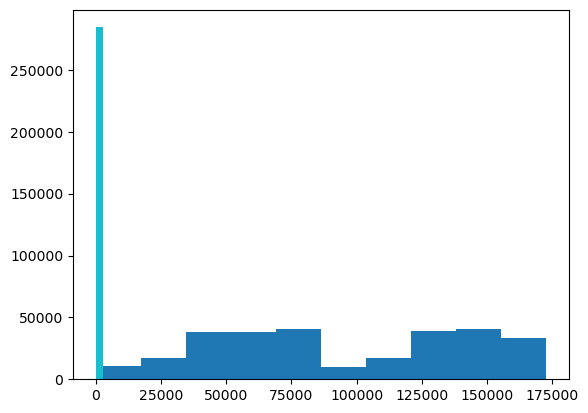

In [7]:
# Plot histograms of each parameter
for column in data.columns:
    plt.hist(data[column])
    plt.show


In [8]:
# Determine number of 1.fraud cases, 2. valid cases.

#code goes here:
fraud=data[data["Class"]==1]
valid=data[data["Class"]==0]
print(fraud.shape[0])
print(valid.shape[0])

492
284315


In [10]:

a=data.columns.tolist()
# Filter the columns to remove data we do not want (Remove Class columns, because that is our target). store under columns variable.
columns=a[:-1]
# Store the variable we'll be predicting on. store under target variable.
target=a[-1]

X = data[columns] 
Y = data[target]   

# Print shapes
print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


In [11]:
# Split data into 80% train and 20% test data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
X_train=train_df.drop(["Class"],axis=1)
Y_train=train_df['Class']
X_test=test_df.drop(["Class"],axis=1)
Y_test=test_df['Class']

In [12]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)  # convert all data into float data type
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
# Decision tree Classifier

#Write code here:  (TRAIN TREE, AND PRINT ACCURACY SCORE)
from sklearn import tree
from sklearn.metrics import accuracy_score
clf=tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, Y_train)
Y_hat=clf.predict(X_test)
print(accuracy_score(Y_hat,Y_test))

0.9994908886626171


In [16]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
clf.fit(X_train_sc, Y_train)
Y_hat=clf.predict(X_test_sc)
print(accuracy_score(Y_hat,Y_test))


0.9994733330992591


## Random Forest Classifier

In [ ]:
# Random forest classifier, fit on Xtrain achieved by splitting
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

In [ ]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
rf_clf_sc=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_sc.fit(X_train_sc,Y_train)
y_pred_rf_sc=rf_clf_sc.predict(X_test_sc)
accuracy_score(Y_test,y_pred_rf_sc)

0.999409744580382

##  AdaBoost Classifier

Treat as example

In [ ]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

abd_clf.fit(X_train,Y_train)
y_pred_abd=abd_clf.predict(X_test)
accuracy_score(Y_test,y_pred_abd)

0.9989268083279674

In [ ]:
# Train with Standard Scalar, fit on X_train_sc achieved by scaling
abd_clf_sc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME.R",
                             random_state=1,)
abd_clf_sc.fit(X_train_sc,y_train)
y_pred_abd_sc=abd_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_abd_sc)

0.9989268083279674

In [19]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:10
   ---------------------------------------- 0.5/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.0/124.9 MB 4.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/124.9 MB 4.1 MB/s eta 0:00:31
   ---------------------------------------- 1.5/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.0/124.9 MB 6.2 MB/s eta 0:00:20
    -----------------------

In [20]:

import xgboost as xgb
from xgboost import XGBClassifier

In [23]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',nestimators=200,learning_rate=0.1)
model.fit(X_train,Y_train)
Y_hat=model.predict(X_test)
accuracy_score(Y_test, Y_hat)

c:\Users\agraw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nestimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9995786664794073

In [24]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',nestimators=200,learning_rate=0.1)
model.fit(X_train_sc,Y_train)
Y_hat=model.predict(X_test_sc)
accuracy_score(Y_test, Y_hat)

c:\Users\agraw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nestimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9995786664794073

In [25]:
#create confusion matrix under the name "cm"
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_hat)

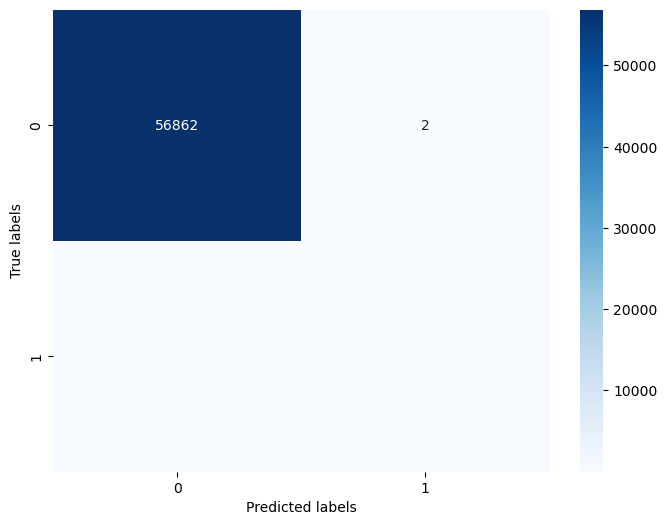

In [29]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Classification report of model

Print a classification report: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [38]:
#print classification report:
from sklearn.metrics import classification_report
report=classification_report(Y_test,Y_hat,output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score       support
0              0.999613  0.999965  0.999789  56864.000000
1              0.974359  0.775510  0.863636     98.000000
accuracy       0.999579  0.999579  0.999579      0.999579
macro avg      0.986986  0.887738  0.931713  56962.000000
weighted avg   0.999570  0.999579  0.999555  56962.000000
